DATA EXPLORATION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
from wordcloud import WordCloud

In [4]:
data = pd.read_csv("spam.csv", encoding='latin-1', usecols=[0, 1])

In [5]:
data.shape

(5572, 2)

In [6]:
# Rename the columns with more explicit names
data.rename(columns={'v1' : 'label', 'v2' : 'message'}, inplace=True)

# Five first rows of the dataset
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Give a brief description of the dataset
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

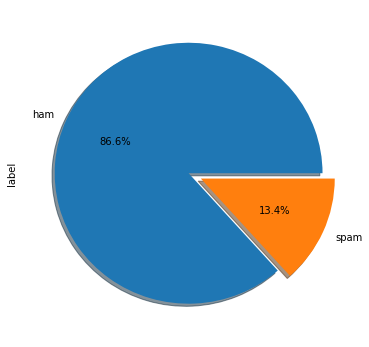

In [8]:
data["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], 
                                      figsize = (6, 6), autopct = '%1.1f%%', 
                                      shadow = True)

In [9]:
data['message'].apply(lambda x: len(x.split(' '))).mean() # average words per sms

15.60678391959799

In [10]:
data['length'] = data['message'].map(lambda text: len(text))
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
data.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

Is there any difference in message length between spam and ham?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5f0135450>,
      dtype=object)

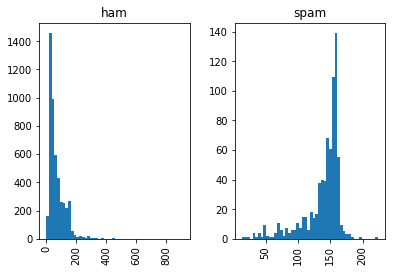

In [12]:
data.hist(column='length', by='label', bins=50)

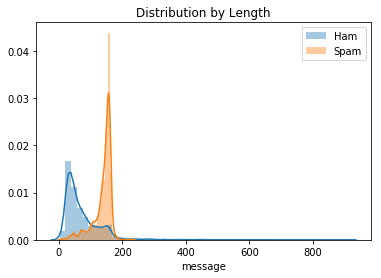

In [13]:
import seaborn as sns
ham =data[data['label'] == 'ham']['message'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['label'] == 'spam']['message'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

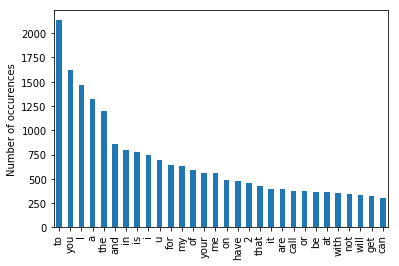

In [14]:
# Visualization of the most frequent words of the dataset
count1 = Counter(" ".join(data["message"]).split()).most_common(30)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words", 1 : "count"})
fig = plt.figure()
ax = fig.add_subplot(111)
df1.plot.bar(ax=ax, legend = False)
xticks = np.arange(len(df1["words"]))
ax.set_xticks(xticks)
ax.set_xticklabels(df1["words"])
ax.set_ylabel('Number of occurences')
plt.show()

In [15]:
# Wordcloud paramters
wc_height, wc_width = (512, 1024)
wc_bckp_color = 'white'
wc_max_words = 400
wc_max_font_size = 60
random_state = 42
wc_figsize = (12, 10)

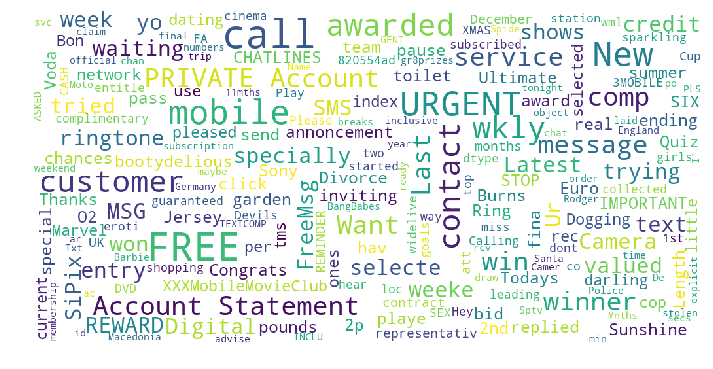

In [16]:
# Extracting spam messages from DataFrame
spam_df = data.loc[data['label'] == 'spam']

# Creating wordcloud for spam
spam_wc = WordCloud(
    height=wc_height, width=wc_width, background_color=wc_bckp_color,
    max_words=wc_max_words, max_font_size=wc_max_font_size,
    random_state=random_state
).generate(str(spam_df['message']))

# Display the wordcloud
fig = plt.figure(figsize=wc_figsize)
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

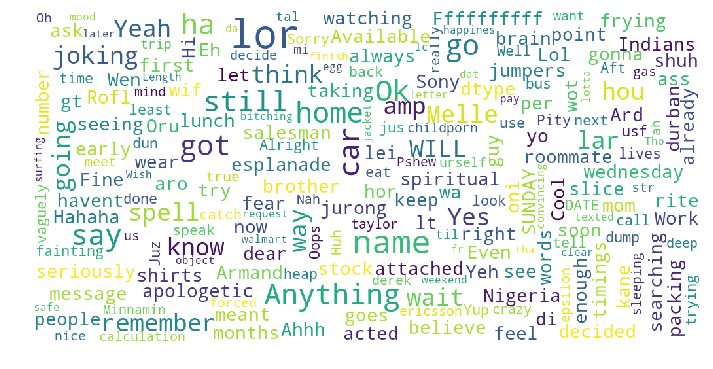

In [17]:
# Extracting ham messages from DataFrame
ham_df = data.loc[data['label'] == 'ham']

# Creating wordcloud for ham
ham_wc = WordCloud(
    height=wc_height, width=wc_width, background_color=wc_bckp_color,
    max_words=wc_max_words, max_font_size=wc_max_font_size,
    random_state=random_state
).generate(str(ham_df['message']))

# Display the wordcloud
fig = plt.figure(figsize=wc_figsize)
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [18]:
#read data in CSV format according to your PC's address
data = pd.read_csv("spam.csv",encoding='latin')

Data Preprocessing:

Now that we have a basic understanding of what our dataset looks like, lets convert our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for ease of computation.

You might be wondering why do we need to do this step? The answer to this lies in how scikit-learn handles inputs. Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally(more specifically, the string labels will be cast to unknown float values).

Our model would still be able to make predictions if we left our labels as strings but we could have issues later when calculating performance metrics, for example when calculating our precision and recall scores. Hence, to avoid unexpected 'gotchas' later, it is good practice to have our categorical values be fed into our model as integers.


    Convert the values in the 'label' column to numerical values using map method as follows: {'ham':0, 'spam':1} This maps the 'ham' value to 0 and the
        ' spam' value to 1.
    Also, to get an idea of the size of the dataset we are dealing with, print out number of rows and columns using 'shape'.


In [19]:
data.rename(columns={'v1':'label','v2':'Text'},inplace=True)
data['numClass'] = data['label'].map({'ham':0, 'spam':1})
data['Count']=0
for i in np.arange(0,len(data.Text)):
    data.loc[i,'Count'] = len(data.loc[i,'Text'])

# Unique values in target set
print("Unique values in the label set: ", data.label.unique())
print('Number of texts in the total set: {}'.format(data.shape[0]))

('Unique values in the label set: ', array([u'ham', u'spam'], dtype=object))
Number of texts in the total set: 5572


In [20]:
ham  = data[data.numClass == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set:", ham['label'].count())
print("Ham Count value", ham_count['Count'].count())


('Number of ham messages in data set:', 4825)
('Ham Count value', 272)


In [21]:
spam = data[data.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set:", spam['label'].count())
print("Spam Count value:", spam_count['Count'].count())

('Number of spam messages in data set:', 747)
('Spam Count value:', 122)


fig, ax = plt.subplots(figsize=(17,5))
spam_count['Count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='red');
ham_count['Count'].value_counts().sort_index().plot(ax=ax, kind='bar',facecolor='green');

Preparing the Data

In [22]:
from __future__ import print_function
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import sem
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Bag of words:
    
What we have here in our data set is a large collection of text data (5,572 rows of data). Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.

Here we'd like to introduce the Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

Note:

    The CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he'
        differently. It does this using the lowercase parameter which is by default set to True.
    It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not
        prefixed or suffixed by a punctuation mark (for example: 'hello'). It does this using the token_pattern parameter which has a default regular 
        expression which selects tokens of 2 or more alphanumeric characters.
    The third parameter to take note of is the stop_words parameter. Stop words refer to the most commonly used words in a language. They include words like 
        'am', 'an', 'and', 'the' etc. By setting this parameter value to english, CountVectorizer will automatically ignore all words(from our input text)
        that are found in the built in list of english stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we
        are trying to find certain key words that are indicative of spam.


In [24]:
#Removing stopwords of English
stopset = set(stopwords.words("english"))
stopset

{u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u"aren't",
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u"couldn't",
 u'd',
 u'did',
 u'didn',
 u"didn't",
 u'do',
 u'does',
 u'doesn',
 u"doesn't",
 u'doing',
 u'don',
 u"don't",
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u"hadn't",
 u'has',
 u'hasn',
 u"hasn't",
 u'have',
 u'haven',
 u"haven't",
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u"isn't",
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u"mightn't",
 u'more',
 u'most',
 u'mustn',
 u"mustn't",
 u'my',
 u'myself',
 u'needn',
 u"needn't",
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 u'off',
 

In [25]:
#Initialising Count Vectorizer
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()
    
X = vectorizer.fit_transform(data.Text)
# Extract target column 'label'
y = data.numClass

In [26]:
vectorizer.get_feature_names()

[u'00',
 u'000',
 u'000pes',
 u'008704050406',
 u'0089',
 u'0121',
 u'01223585236',
 u'01223585334',
 u'0125698789',
 u'02',
 u'0207',
 u'02072069400',
 u'02073162414',
 u'02085076972',
 u'021',
 u'03',
 u'04',
 u'0430',
 u'05',
 u'050703',
 u'0578',
 u'06',
 u'07',
 u'07008009200',
 u'07046744435',
 u'07090201529',
 u'07090298926',
 u'07099833605',
 u'07123456789',
 u'0721072',
 u'07732584351',
 u'07734396839',
 u'07742676969',
 u'07753741225',
 u'0776xxxxxxx',
 u'07781482378',
 u'07786200117',
 u'077xxx',
 u'078',
 u'07801543489',
 u'07808',
 u'07808247860',
 u'07808726822',
 u'07815296484',
 u'07821230901',
 u'078498',
 u'07880867867',
 u'0789xxxxxxx',
 u'07946746291',
 u'0796xxxxxx',
 u'07973788240',
 u'07xxxxxxxxx',
 u'08',
 u'0800',
 u'08000407165',
 u'08000776320',
 u'08000839402',
 u'08000930705',
 u'08000938767',
 u'08001950382',
 u'08002888812',
 u'08002986030',
 u'08002986906',
 u'08002988890',
 u'08006344447',
 u'0808',
 u'08081263000',
 u'08081560665',
 u'0825',
 u'083',
 

In [27]:
X

<5572x8672 sparse matrix of type '<type 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [30]:
doc_array = vectorizer.transform(data.Text).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

frequency_matrix = pd.DataFrame(doc_array, columns = vectorizer.get_feature_names())
frequency_matrix.head()

Training and testing sets:

Now that we have understood how to deal with the Bag of Words problem we can get back to our dataset and proceed with our analysis. Our first step in this regard would be to split our dataset into a training and testing set so we can test our model later.

    Instructions: Split the dataset into a training and testing set by using the train_test_split method in sklearn. Split the data using the following variables:

        X_train is our training data for the 'text' column.
        y_train is our training data for the 'label' column
        X_test is our testing data for the 'text' column.
        y_test is our testing data for the 'label' column Print out the number of rows we have in each our training and testing data.



In [ ]:
#Performing test train Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=None)

# Show the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 3900 samples.
Testing set has 1672 samples.




Training and Evaluating Models

In [ ]:
objects = ('Multi-NB','SVM','KNN', 'RF')

In [ ]:
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

In [ ]:
# function to predict features 
def predict_labels(clf, features):
    return(clf.predict(features))

In [ ]:
pip install catboost

In [ ]:
# Initialize the four models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = SVC(kernel='linear',probability=True)
C = KNeighborsClassifier(n_neighbors=1)
D = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None)

In [ ]:
clf = [A,B,C,D]
acc_score = [0,0,0,0]
accuracy = [0,0,0,0]

Multi-NB
Accuracy in %:
98.26555023923444
F1 Score
0.9345372460496613




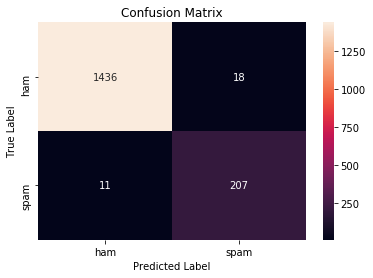

Train accuracy:  0.9930769230769231
mse test data:  0.017344497607655503
mse train data:  0.006923076923076923



SVM
Accuracy in %:
98.6244019138756
F1 Score
0.9461358313817332




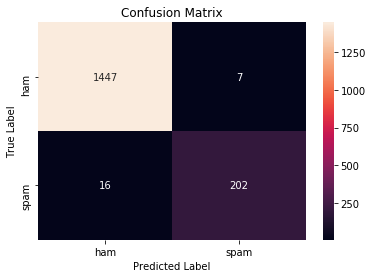

Train accuracy:  1.0
mse test data:  0.01375598086124402
mse train data:  0.0



KNN
Accuracy in %:
95.75358851674642
F1 Score
0.8054794520547944




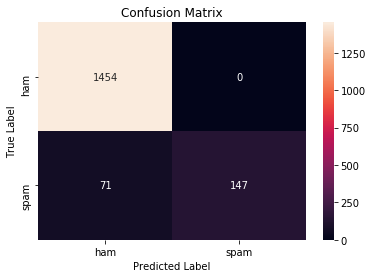

Train accuracy:  1.0
mse test data:  0.042464114832535885
mse train data:  0.0



RF
Accuracy in %:
97.06937799043062
F1 Score
0.8771929824561403




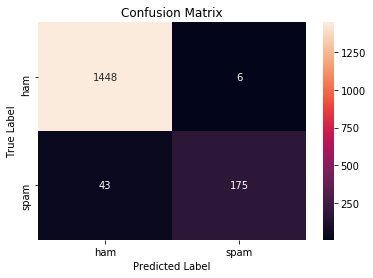

Train accuracy:  0.9953846153846154
mse test data:  0.02930622009569378
mse train data:  0.004615384615384616





In [ ]:
for a in range(0,4):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a]=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")
    cm = confusion_matrix(y_test, y_pred)
    class_label = ["ham", "spam"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print("Train accuracy: ", clf[a].fit(X_train, y_train).score(X_train, y_train))
    print("mse test data: ",mean_squared_error(y_test, y_pred))
    y_train_pred = predict_labels(clf[a],X_train)
    print("mse train data: ",mean_squared_error(y_train, y_train_pred))
    print("\n\n")


Accuracy in 0,1 %:
98.92344497607655
F1 Score
0.9585253456221199




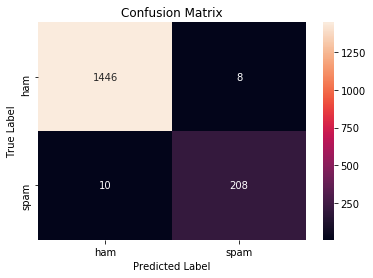




Accuracy in 0,2 %:
98.56459330143541
F1 Score
0.9441860465116279




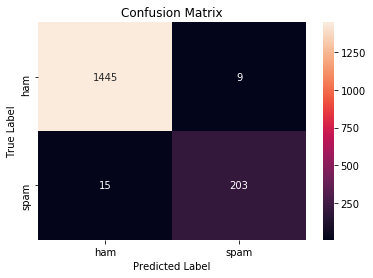




Accuracy in 0,3 %:
98.56459330143541
F1 Score
0.9447004608294931




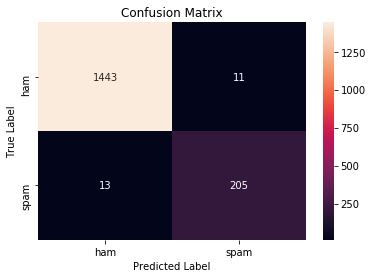




Accuracy in 1,2 %:
98.68421052631578
F1 Score
0.9485981308411215




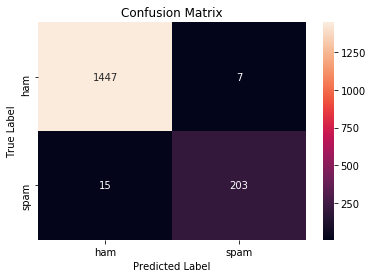




Accuracy in 1,3 %:
98.80382775119617
F1 Score
0.9534883720930233




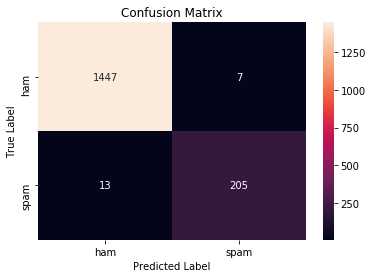




Accuracy in 2,3 %:
96.88995215311004
F1 Score
0.8645833333333333




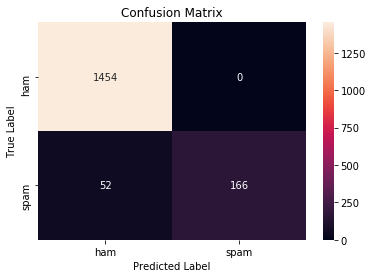




Accuracy in 0,1,2%:
98.92344497607655
F1 Score
0.9579439252336448




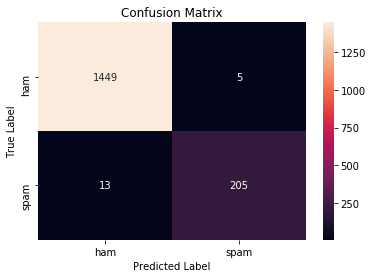




Accuracy in 0,2,3 %:
98.92344497607655
F1 Score
0.9577464788732395




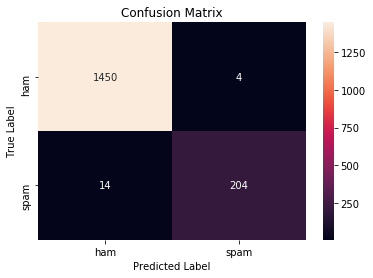




Accuracy in 1,2,3 %:
98.74401913875597
F1 Score
0.9505882352941177




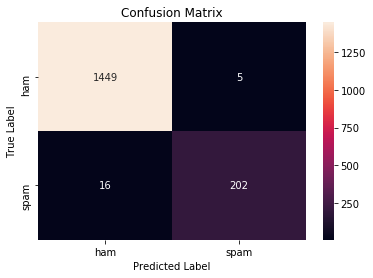




Accuracy in all %:
98.92344497607655
F1 Score
0.9579439252336448




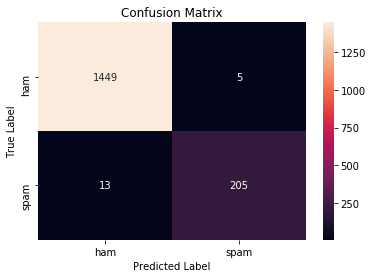

In [ ]:
eclf = VotingClassifier(estimators=[ ('m1', clf[0]), ('m2', clf[1])], voting='soft', weights=[1,2])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy in 0,1 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[0]), ('m2', clf[2])], voting='soft', weights=[2,1])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 0,2 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[0]), ('m2', clf[3])], voting='soft', weights=[2,1])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 0,3 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[1]), ('m2', clf[2])], voting='soft', weights=[2,1])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 1,2 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[1]), ('m2', clf[3])], voting='soft', weights=[2,1])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 1,3 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[2]), ('m2', clf[3])], voting='soft', weights=[1,2])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 2,3 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[0]), ('m2', clf[1]), ('m3', clf[2])], voting='soft', weights=[2,3,1])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 0,1,2%:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")   
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[0]), ('m2', clf[2]), ('m3', clf[3])], voting='soft', weights=[3,1,2])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 0,2,3 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[1]), ('m2', clf[2]), ('m3', clf[3])], voting='soft', weights=[3,1,2])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in 1,2,3 %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")

eclf = VotingClassifier(estimators=[ ('m1', clf[0]), ('m2', clf[1]), ('m3', clf[2]), ('m4', clf[3])], voting='soft', weights=[2,2,1,1])      
eclf = eclf.fit(X_train, y_train)                 
y_pred = eclf.predict(X_test)
pred_val = f1_score(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print("Accuracy in all %:")
print(acc*100)
print("F1 Score")
print(pred_val)
print("\n")  
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\n\n")


In [ ]:
y_pos = np.arange(len(objects))
y_val = [ x for x in acc_score]

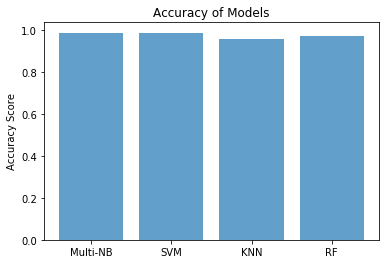

In [ ]:
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

Multi-NB
Accuracy: 98.11551257054238 standard_error: 0.001897666441373341
SVM
Accuracy: 98.45659350205595 standard_error: 0.0013940023750953553
KNN
Accuracy: 95.45935406652382 standard_error: 0.0015411468407504605
RF
Accuracy: 97.18219725487926 standard_error: 0.0017372313928766053


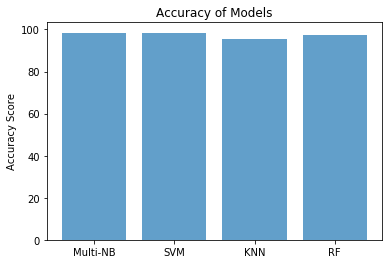

In [ ]:
for a in range(0,4):
    print(objects[a])
    kfolds = KFold(n_splits=10, random_state=7)
    score = cross_val_score(clf[a], X, y, cv=kfolds)
    print("Accuracy:",(score.mean()*100), "standard_error:", sem(score))
    accuracy[a]=score.mean()*100

y_pos = np.arange(len(objects))
y_val = [ x for x in accuracy]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

In [ ]:
kfolds = KFold(n_splits=10, random_state=7)
eclf = VotingClassifier(estimators=[ ('m1', clf[0]), ('m2', clf[1])], voting='soft', weights=[1,2])      
score = cross_val_score(eclf, X, y, cv=kfolds)
print("Accuracy:",(score.mean()*100), "standard_error:", sem(score))

Accuracy: 98.90520131528993 standard_error: 0.0013224946762976782


CHANCE LEVEL

In [ ]:
print(y.shape)

(5572,)


In [ ]:
nums = np.random.choice([0, 1], size=5572)
accuracy=accuracy_score(y, nums)
print("accuracy: ",accuracy*100)

accuracy:  49.407753050969134
